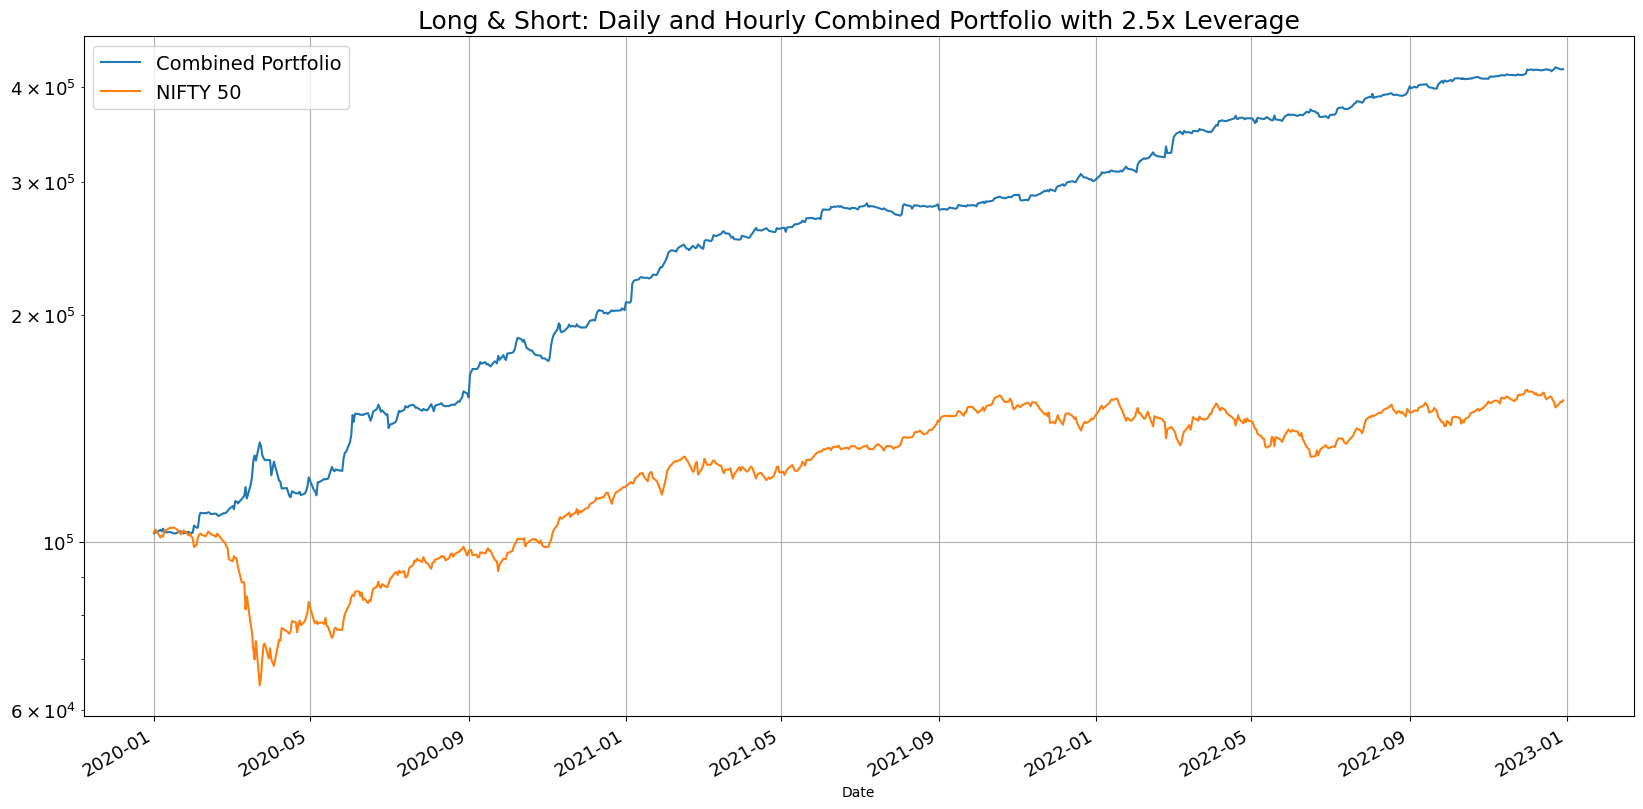

Strategy Returns: 311.28 %
Annual Strategy ret: 60.36 %
Max Drawdowns Strategy: 15.38 %
NIFTY 50 Returns: 49.39 %
NIFTY 50 Annual ret: 14.34 %
Max DD NIFTY 50: 38.22 %


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
df_final = pd.read_csv("6alloc1x.csv",index_col=0,parse_dates=True)
df_final["Combined Portfolio"]=df_final["final tot cash"]
df_final["NIFTY 50"]=df_final["NIFTY 50_NAV_only"]


df_final[["Combined Portfolio","NIFTY 50"]].plot(logy=True,fontsize = 13,figsize=(20, 10),grid=True).legend(fontsize = 14,loc='upper left')
plt.title("Long & Short: Daily and Hourly Combined Portfolio with 2.5x Leverage",fontsize = 18)
plt.show()

sig_df = pd.read_csv("6alloc1x.csv",index_col=0,parse_dates=True)

print("Strategy Returns:",round(sig_df["Total_NAV_Cummulative final"][-1]*100,2),"%")


n_days=(sig_df.index[-1]-sig_df.index[0]).days#(datetime.datetime.strptime(sig_df.index[-1],"%Y-%m-%d %H:%M:%S")-datetime.datetime.strptime(sig_df.index[0],"%Y-%m-%d %H:%M:%S")).total_seconds() / (3600*24)
annual_ret_Total_NAV=((((sig_df["Total_NAV_ret final"]+1).cumprod()[-1])**(1/(n_days/365)))-1)*100


print("Annual Strategy ret:",round(annual_ret_Total_NAV,2),"%")            
            

sig_df["cum_return"] = (1 + sig_df["Total_NAV_ret final"]).cumprod()
sig_df["cum_roll_max"] = sig_df["cum_return"].cummax()
sig_df["drawdown"] = sig_df["cum_roll_max"] - sig_df["cum_return"]
sig_df["drawdown_pct"] = sig_df["drawdown"]/sig_df["cum_roll_max"]
max_dd_Total_NAV = sig_df["drawdown_pct"].max()


print("Max Drawdowns Strategy:",round(max_dd_Total_NAV*100,2),"%")

sig_df["BTC_NAV_ret"]=sig_df["NIFTY 50_NAV_only"].pct_change()
sig_df["BTC_NAV_Cummulative"]=(sig_df['BTC_NAV_ret']+1).cumprod()-1


print("NIFTY 50 Returns:",round(sig_df["BTC_NAV_Cummulative"][-1]*100,2),"%")


n_days=(sig_df.index[-1]-sig_df.index[0]).days#(datetime.datetime.strptime(sig_df.index[-1],"%Y-%m-%d %H:%M:%S")-datetime.datetime.strptime(sig_df.index[0],"%Y-%m-%d %H:%M:%S")).total_seconds() / (3600*24)
annual_ret_BTC_NAV=((((sig_df["BTC_NAV_ret"]+1).cumprod()[-1])**(1/(n_days/365)))-1)*100


print("NIFTY 50 Annual ret:",round(annual_ret_BTC_NAV,2),"%")            
            
sig_df["cum_return"] = (1 + sig_df["BTC_NAV_ret"]).cumprod()
sig_df["cum_roll_max"] = sig_df["cum_return"].cummax()
sig_df["drawdown"] = sig_df["cum_roll_max"] - sig_df["cum_return"]
sig_df["drawdown_pct"] = sig_df["drawdown"]/sig_df["cum_roll_max"]
max_dd_BTC_NAV = sig_df["drawdown_pct"].max()
print("Max DD NIFTY 50:",round(max_dd_BTC_NAV*100,2),"%")



Text(0.5, 1.0, 'Long & Short 50:50')

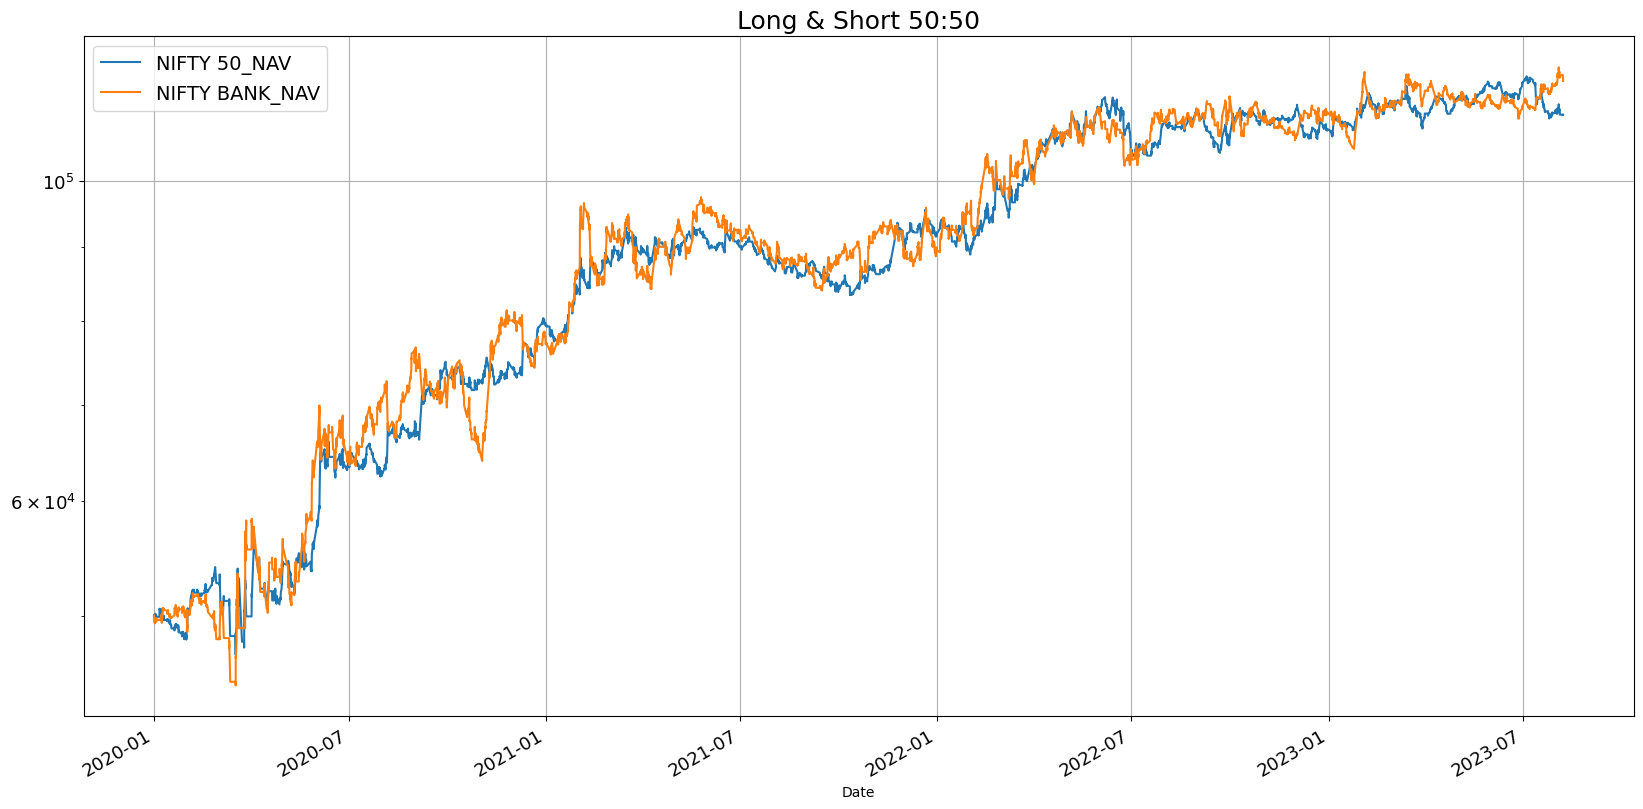

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df_final = pd.read_csv("alloc.csv",index_col=0,parse_dates=True)
df_final["Total NAV"]=df_final["Total_Cash"]
df_final["BTC BNH"]=df_final["NIFTY 50_NAV_only"]


df_final[["NIFTY 50_NAV","NIFTY BANK_NAV"]].plot(logy=True,fontsize = 13,figsize=(20, 10),grid=True).legend(fontsize = 14,loc='upper left')
plt.title("Long & Short 50:50",fontsize = 18)

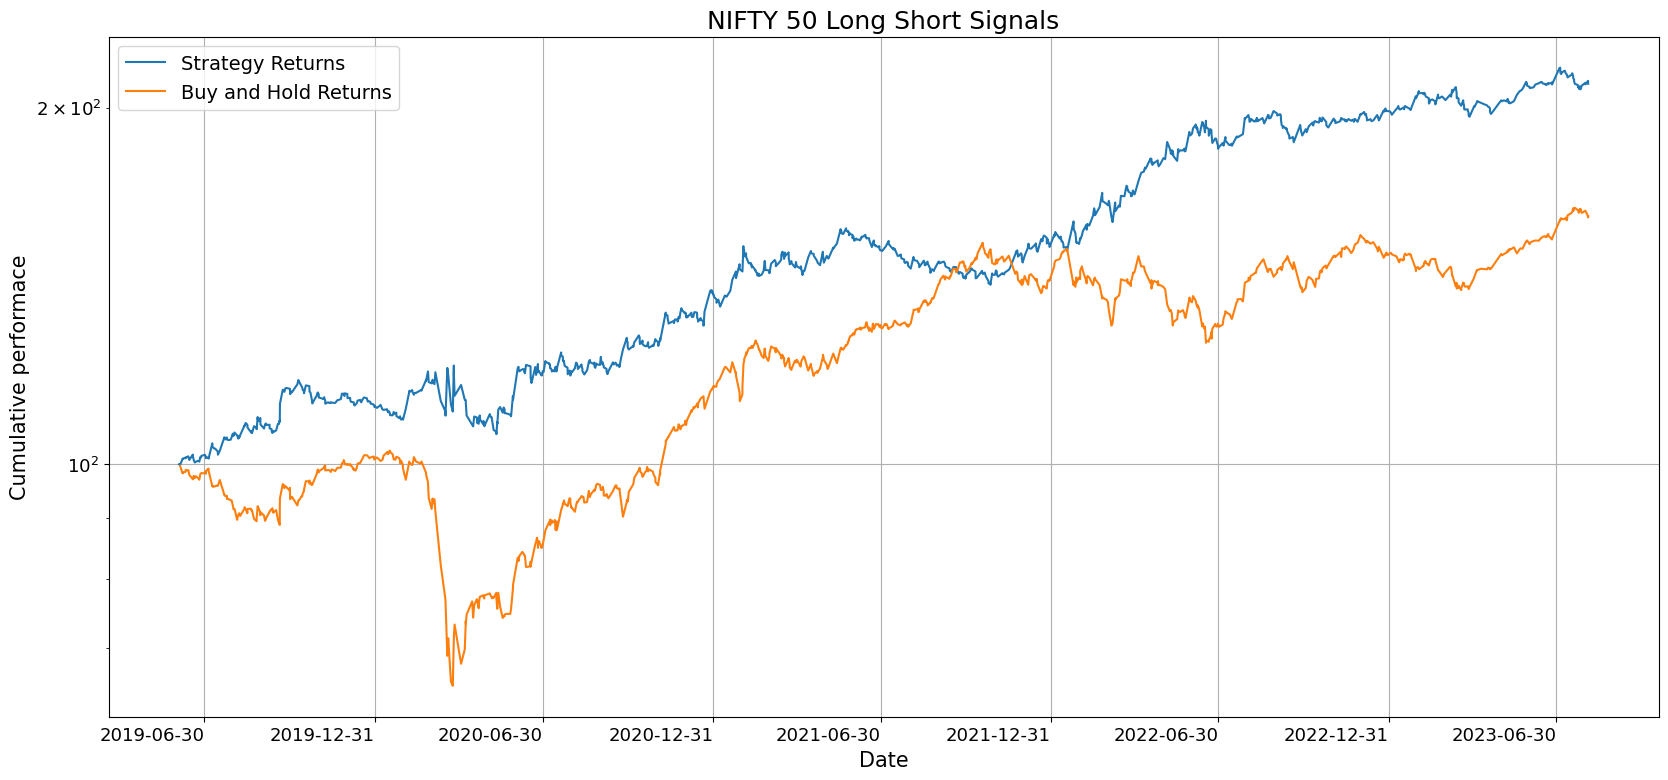

Buy and Hold Returns = 62.03 %
Strategy Returns = 109.58 %
Annualized returns = 13.02 %
Strategy Max Drawdown: 12.49 %
Buy and Hold Max Drawdown: 36.71 %
Sharpe Ratio= 0.93
Sortino Ratio= 1.61
Annualized Volatility= 0.15 %
Number of Positive trades: 423
Number of Negative trades: 810
Number of total trades: 1233


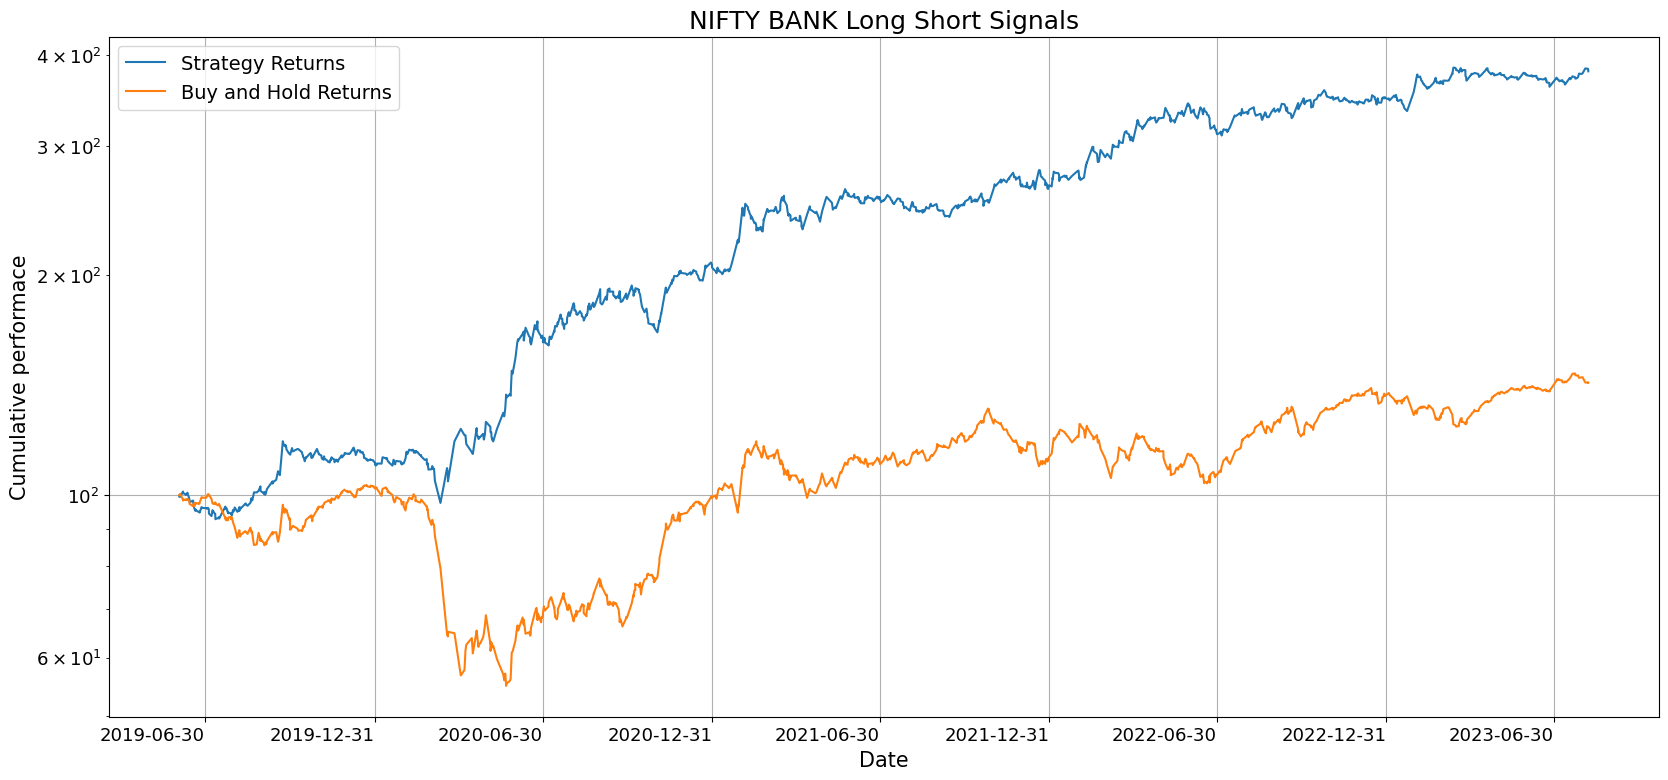

Buy and Hold Returns = 42.72 %
Strategy Returns = 280.09 %
Annualized returns = 24.67 %
Strategy Max Drawdown: 17.66 %
Buy and Hold Max Drawdown: 46.81 %
Sharpe Ratio= 1.16
Sortino Ratio= 3.11
Annualized Volatility= 0.21 %
Number of Positive trades: 460
Number of Negative trades: 950
Number of total trades: 1410


In [4]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from dateutil import parser

coins=["NIFTY 50","NIFTY BANK"]

for coin in coins:
    df=pd.read_csv(coin+"_trades.csv")
    
    df_bnh=pd.read_csv("COIN_DATA/"+coin+"_mod_day2.csv",index_col=0)
        
    #Intialising variables to get performance metrics and graphs
    dates=[]
    log_cum_prod=[]
    cum_prod=[]
    max_dd=[]
    max_dd_bnh=[]
    pct_chg=[]
    bnh_pct_chg=[]
    dates_ret=[]
    n_close=[]
    
    for i in range(len(df)):
        if(i==0):
            dates.append(df["Date"][i])
            log_cum_prod.append(100)
            cum_prod.append(0)
            
           
            pct_chg.append(0)
            n_close.append(df_bnh["Close"][df["Date"][i]])
            dates_ret.append(df["Date"][i])
        elif(i%2!=0):
            dates.append(df["Date"][i])
            dates_ret.append(df["Date"][i])
            log_cum_prod.append((df["Cum_prod"][i]+1)*100)
            cum_prod.append(df["Cum_prod"][i])
            
            
            pct_chg.append(df["pct_pnl"][i])
            
            n_close.append(df_bnh["Close"][df["Date"][i]])
            





    df_final=pd.DataFrame(list(zip(n_close,pct_chg)), index =dates_ret,columns =["close","s_returns"])
    df_final.index=pd.to_datetime(df_final.index)
    df_final['c_s_ret']=(df_final['s_returns']+1).cumprod()-1
    df_final["bnh_ret"]=df_final["close"].pct_change()
    df_final["bnh"]=(df_final['bnh_ret']+1).cumprod()-1
    bnh = (df_final['bnh_ret']+1).cumprod()[-1]
    s_returns = (df_final['s_returns']+1).cumprod()[-1]
    
    df_final["Strategy Returns"]=(df_final["c_s_ret"]+1)*100
    df_final["Buy and Hold Returns"]=(df_final["bnh"]+1)*100
    #Making log plot
    df_final[["Strategy Returns","Buy and Hold Returns"]].plot(logy=True,fontsize = 13,figsize=(20, 10),grid=True).legend(fontsize = 14,loc='upper left')
    plt.title(coin+" Long Short Signals",fontsize = 18)
    
    dtFmt = mdates.DateFormatter('%Y-%m-%d') # define the formatting
    plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
    
    plt.xlabel('Date',fontsize = 15)
    plt.xticks(rotation=0, ha='right')
    plt.ylabel('Cumulative performace',fontsize = 15)
    plt.show()
    
    print("Buy and Hold Returns =",round(((bnh-1)*100),2),"%")
    print("Strategy Returns =",round(((s_returns-1)*100),2),"%")
    
    
    n_days=(datetime.datetime.strptime(dates[-1],"%Y-%m-%d %H:%M:%S%z")-datetime.datetime.strptime(dates[0],"%Y-%m-%d %H:%M:%S%z")).total_seconds() / (3600*24)
    annual_ret=((s_returns**(1/(n_days/252)))-1)*100
    print("Annualized returns =",round(annual_ret,2),"%")
    
    start_date=datetime.datetime.strptime(dates[0],"%Y-%m-%d %H:%M:%S%z")
    
    #calculating drawdowns 
    df_final["cum_return"] = (1 + df_final["s_returns"]).cumprod()
    df_final["cum_roll_max"] = df_final["cum_return"].cummax()
    df_final["drawdown"] = df_final["cum_roll_max"] - df_final["cum_return"]
    df_final["drawdown_pct"] = df_final["drawdown"]/df_final["cum_roll_max"]
    max_dd = df_final["drawdown_pct"].max()
    print("Strategy Max Drawdown:",round(max_dd*100,2),"%")
    list_dd=max_dd

    df_final["cum_return"] = (1 + df_final["bnh_ret"]).cumprod()
    df_final["cum_roll_max"] = df_final["cum_return"].cummax()
    df_final["drawdown"] = df_final["cum_roll_max"] - df_final["cum_return"]
    df_final["drawdown_pct"] = df_final["drawdown"]/df_final["cum_roll_max"]
    max_dd = df_final["drawdown_pct"].max()
    print("Buy and Hold Max Drawdown:",round(max_dd*100,2),"%")
    
    # Set a risk-free rate
    risk_free_rate = 0.02/252

    # Calculate Sharpe ratio
    sharpe_ratio = np.sqrt(252)*(np.mean(df_final['s_returns']) -
                             (risk_free_rate))/np.std(df_final['s_returns'])
    print("Sharpe Ratio=",round(sharpe_ratio,2))
    
    # Calculate Sortino ratio
    neg_return = np.where(df_final["s_returns"]>0,0,df_final["s_returns"])
    neg_vol = pd.Series(neg_return[neg_return!=0]).std() * np.sqrt(252)
    sortino_ratio=((annual_ret/100)- (risk_free_rate*252))/neg_vol
    
    print("Sortino Ratio=",round(sortino_ratio,2))
    
    
    annualised_volatility = df_final['s_returns'].std()*np.sqrt(252)
    print("Annualized Volatility=",round(annualised_volatility,2),"%")
    
    print("Number of Positive trades:",len(df_final[df_final["s_returns"]>0]))
    
    print("Number of Negative trades:",len(df_final[df_final["s_returns"]<0]))
    
    
    print("Number of total trades:",len(df_final)-1)
    
    
    
    #list_data.append([coin,start_date,round(annual_ret,2),round(list_dd*100,2)])
    
 